In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_RF = rf.predict(X_test)
accuracy_score(y_test, y_pred_RF)

0.4505327245053272

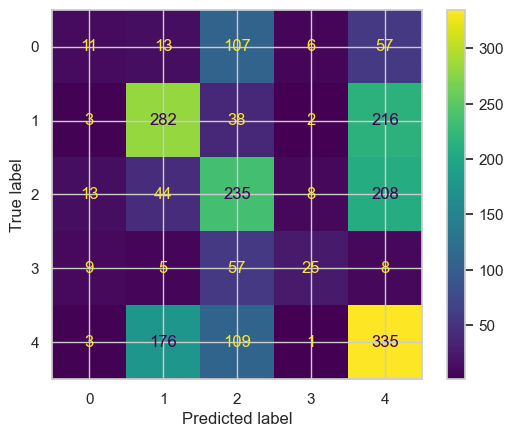

In [ ]:
cm = confusion_matrix(y_test, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

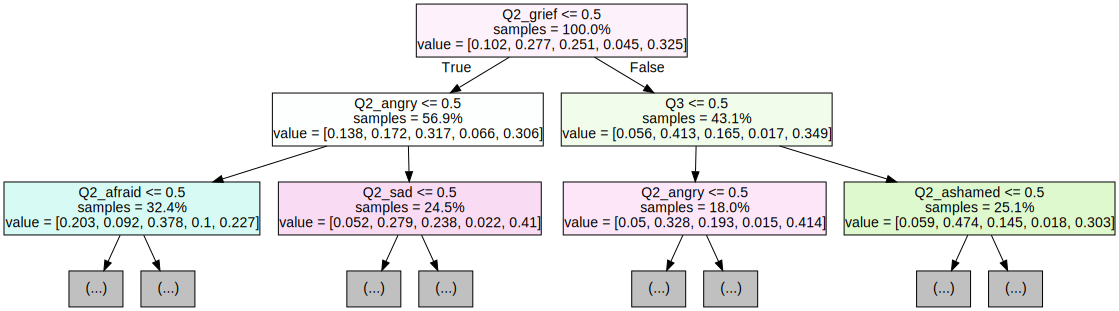

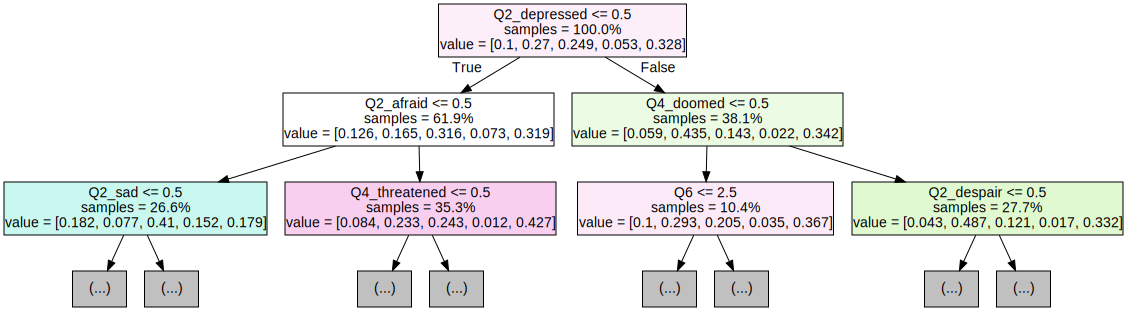

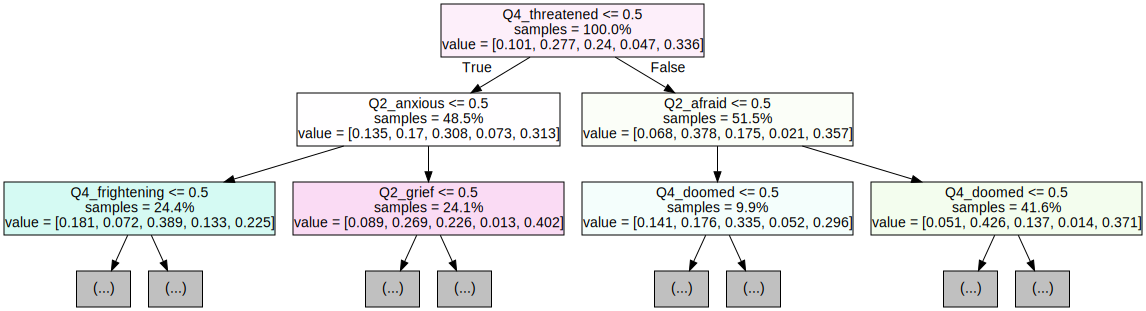

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

NameError: name 'randint' is not defined

In [ ]:
# best model!
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(np.mean(y_pred == y_test), np.mean(y_pred != y_test))

##### Random Forest (Bagging Classifier)

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [ ]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(X_train, y_train)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
precision_score(y_test, pred, average='macro')

In [ ]:
recall_score(y_test, pred, average='macro')